#Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.model_selection import train_test_split

#Getting data

In [108]:
df=pd.read_csv("/content/BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#Exploring data

In [110]:
df.columns[:-1]

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

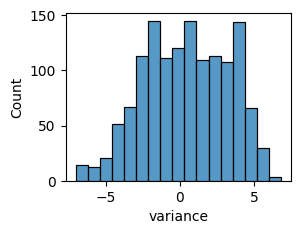

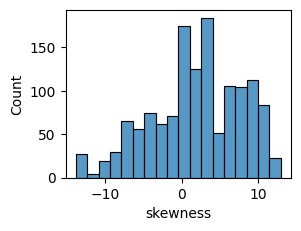

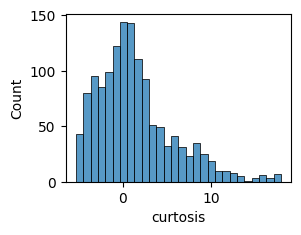

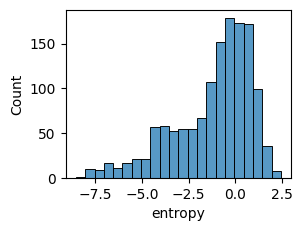

In [111]:
i=1
for column in df.columns[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df, x=column)
    plt.xlabel("{0}".format(column))
    plt.ylabel('Count')
    plt.show()
    i=i+1

The countplots of the features have a normal distribution with "curtosis" and "entropy" having skewed distribution

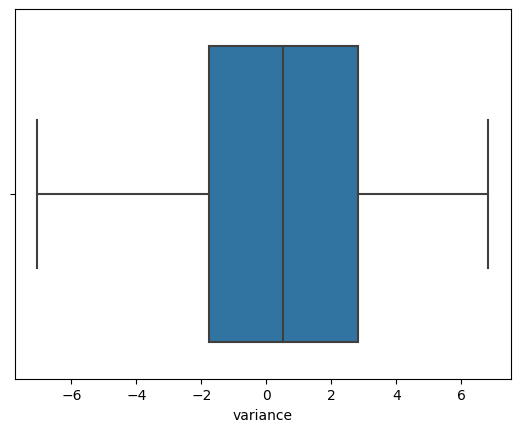

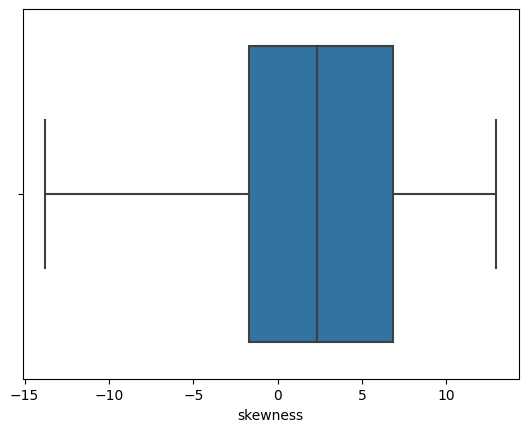

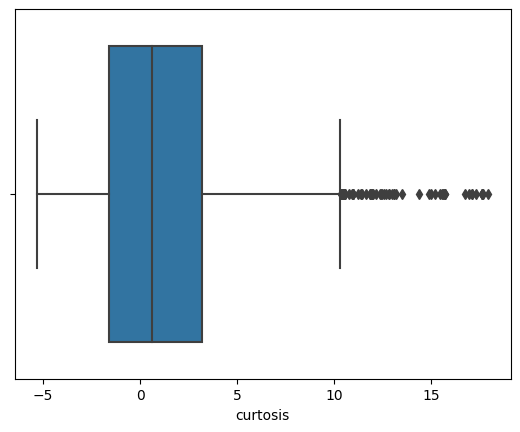

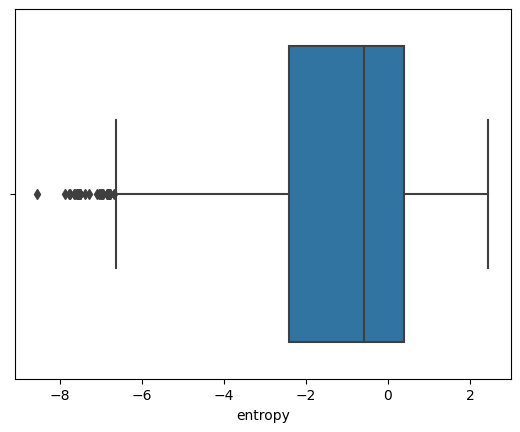

In [112]:
for column in df.columns[:-1]:
    sns.boxplot(df, x=column)
    plt.xlabel("{0}".format(column))
    plt.show()

"curtosis" has outliers

In [113]:
quant25=df["curtosis"].quantile(0.25)
quant75=df["curtosis"].quantile(0.75)
iqr=quant75-quant25
iqr

4.754225

In [114]:
u_limit=quant75 + 1.5 * iqr
l_limit=quant25 - 1.5 * iqr

In [115]:
df[(df["curtosis"]>u_limit) | (df["curtosis"]<l_limit)]

,variance,skewness,curtosis,entropy,class
765,-3.8483,-12.8047,15.6824,-1.281000,1
780,-3.5801,-12.9309,13.1779,-2.567700,1
815,-3.1128,-6.8410,10.7402,-1.017200,1
816,-4.8554,-5.9037,10.9818,-0.821990,1
820,-4.0025,-13.4979,17.6772,-3.320200,1
821,-4.0173,-8.3123,12.4547,-1.437500,1
826,-4.2110,-12.4736,14.9704,-1.388400,1
841,-3.8858,-12.8461,12.7957,-3.135300,1
877,-5.1216,-5.3118,10.3846,-1.061200,1
881,-4.4861,-13.2889,17.3087,-3.219400,1


"entropy" has outliers

In [116]:
quant_25=df["entropy"].quantile(0.25)
quant_75=df["entropy"].quantile(0.75)
iqr_1=quant_75-quant_25
iqr_1

2.80826

In [117]:
u_limit1=quant_75 + 1.5 * iqr_1
l_limit1=quant_25 - 1.5 * iqr_1

In [118]:
df[(df["entropy"]>u_limit1) | (df["entropy"]<l_limit1)]

,variance,skewness,curtosis,entropy,class
41,-0.20620,9.2207,-3.704400,-6.8103,0
45,-0.78690,9.5663,-3.786700,-7.5034,0
47,-0.78690,9.5663,-3.786700,-7.5034,0
59,-0.78289,11.3603,-0.376440,-7.0495,0
139,-0.20620,9.2207,-3.704400,-6.8103,0
194,-2.34100,12.3784,0.704030,-7.5836,0
202,-0.78689,9.5663,-3.786700,-7.5034,0
291,-2.21530,11.9625,0.078538,-7.7853,0
341,-1.18040,11.5093,0.155650,-6.8194,0
394,-2.26230,12.1177,0.288460,-7.7581,0


Since the number of rows with outliers are more, dropping them will reduce the data, hence we will have to perform winsorization

In [119]:
df["curtosis"]=np.where(df["curtosis"]>u_limit,u_limit,
                        np.where(df["curtosis"]<l_limit,l_limit,df["curtosis"]))

<Axes: xlabel='curtosis'>

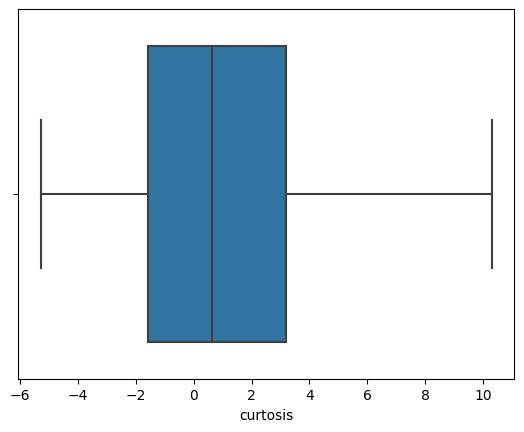

In [120]:
sns.boxplot(df, x="curtosis")

In [121]:
df["entropy"]=np.where(df["entropy"]>u_limit1,u_limit1,
                       np.where(df["entropy"]<l_limit1,l_limit1,df["entropy"]))

<Axes: xlabel='entropy'>

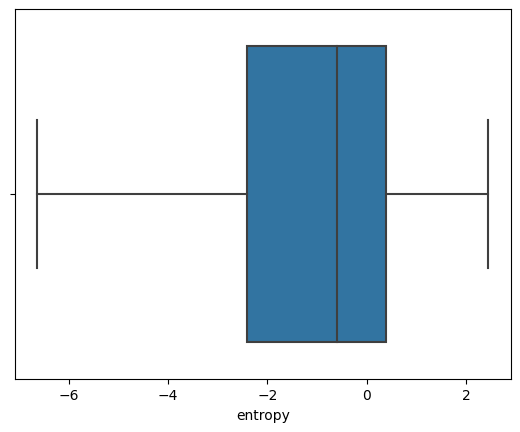

In [122]:
sns.boxplot(df, x="entropy")

Lets see the distribution of all classes in dataset

<Axes: xlabel='class', ylabel='count'>

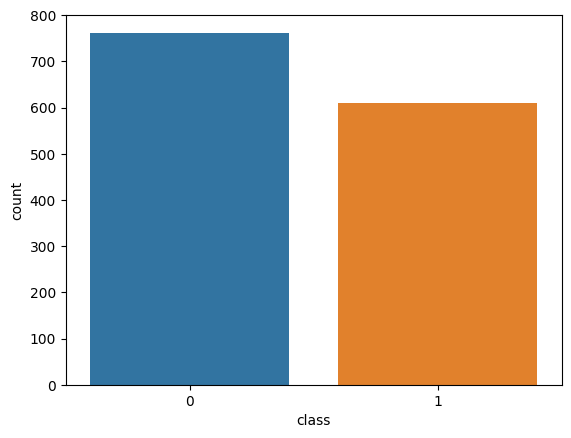

In [123]:
sns.countplot(x=df["class"])

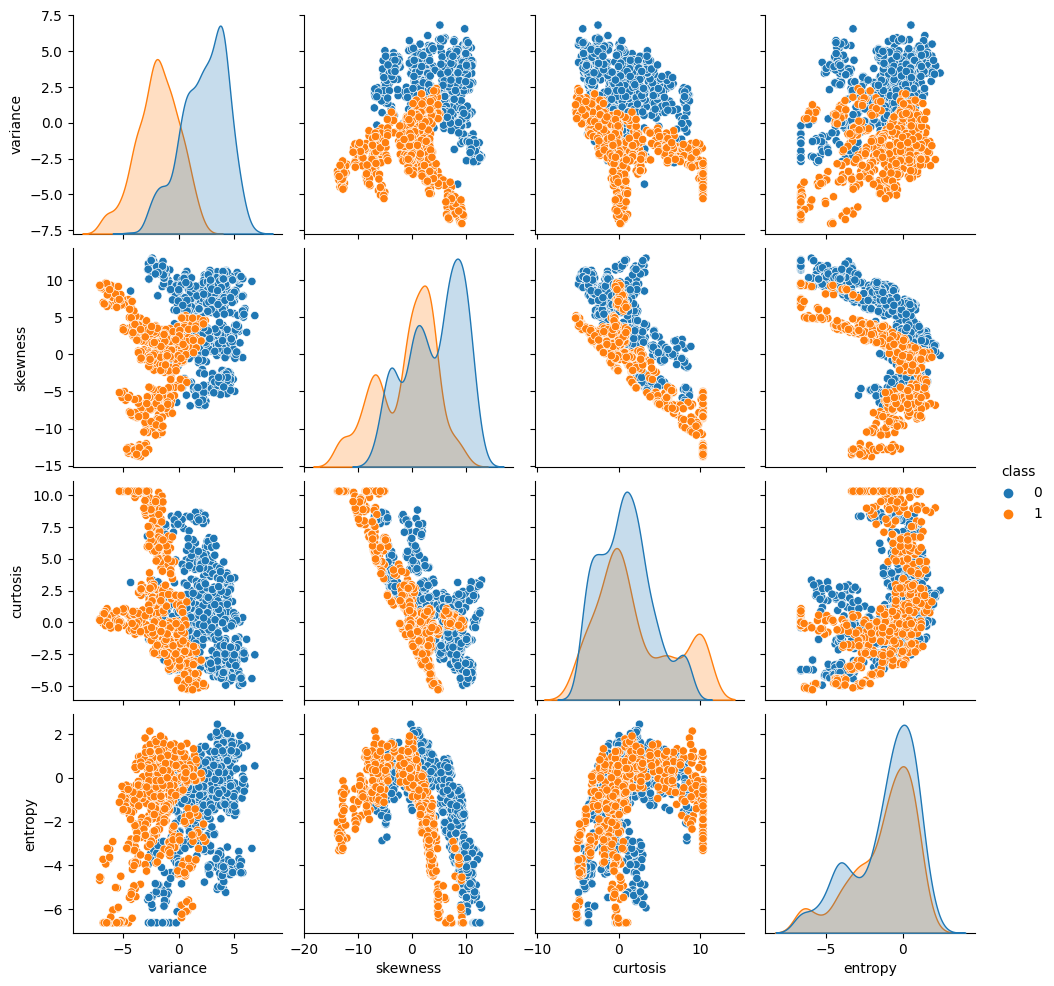

In [124]:
sns.pairplot(df,hue='class')

<Axes: >

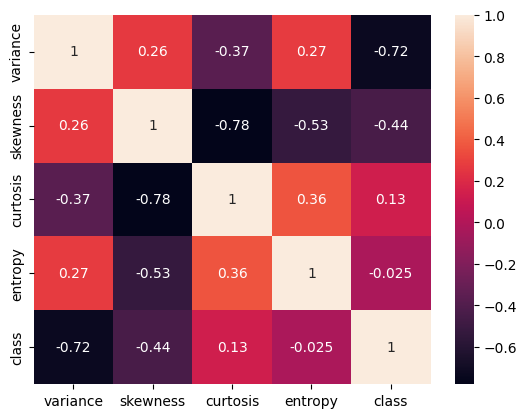

In [125]:
sns.heatmap(df.corr(),annot=True)

The features do not show any significant correlation

In [126]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.272588,-1.175606,0.444606
std,2.842763,5.869047,3.963437,2.055327,0.497103
min,-7.042100,-13.773100,-5.286100,-6.625840,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,10.310588,2.449500,1.000000


Train test Split

In [127]:
y=to_categorical(df["class"])
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [128]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("class",axis=1).values,y,test_size=0.2,random_state=78)

#Building network

In [144]:
from tensorflow.keras.models import Sequential

In [145]:
model=Sequential()

In [131]:
from tensorflow.keras.layers import Dense,Dropout

In [146]:
model.add(Dense(15,activation="relu",input_shape=(4,)))   #10
model.add(Dropout(0.3))
model.add(Dense(15,activation="relu"))                 #10

In [147]:
model.add(Dense(2,activation="softmax"))

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

In [148]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min', patience=5)

In [149]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [150]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 15)                75        
                                                                 
 dropout_19 (Dropout)        (None, 15)                0         
                                                                 
 dense_56 (Dense)            (None, 15)                240       
                                                                 
 dense_57 (Dense)            (None, 2)                 32        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [151]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs = 30, verbose = 1, callbacks=[es])

Epoch 1/30
35/35 [==============================] - 1s 9ms/step - loss: 0.6545 - accuracy: 0.6326 - val_loss: 0.4849 - val_accuracy: 0.7345
Epoch 2/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4972 - accuracy: 0.7375 - val_loss: 0.3854 - val_accuracy: 0.7964
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.8086 - val_loss: 0.3080 - val_accuracy: 0.9055
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8760 - val_loss: 0.2442 - val_accuracy: 0.9382
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8760 - val_loss: 0.1934 - val_accuracy: 0.9527
Epoch 6/30
35/35 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9025 - val_loss: 0.1555 - val_accuracy: 0.9745
Epoch 7/30
35/35 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9107 - val_loss: 0.1187 - val_accuracy: 0.9855
Epoch 8/30
35/35 [==

Early stopping won't help us as better accuracy is achieved within some epochs

#Visualizing the accuracy and loss

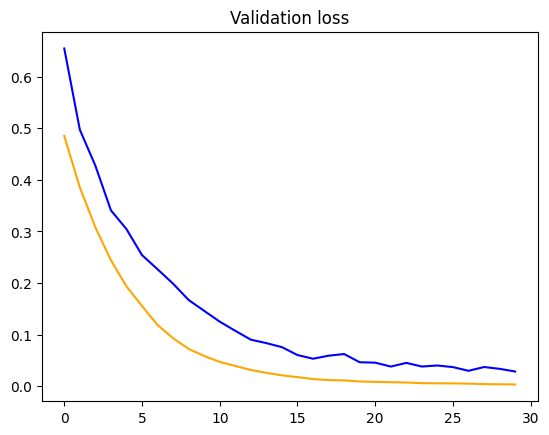

In [152]:
plt.plot(history.history['loss'], c = 'blue')
plt.plot(history.history['val_loss'], c = 'orange')
plt.title("Validation loss")
plt.show()

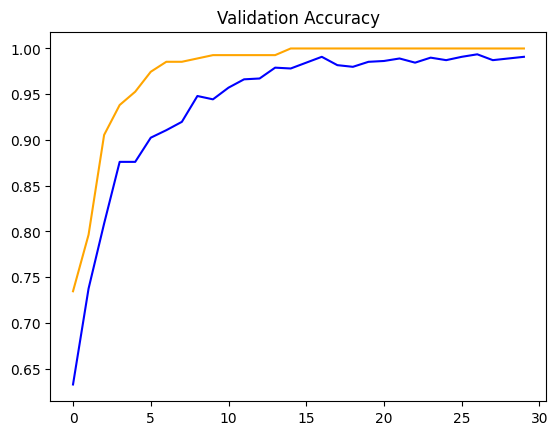

In [153]:
plt.plot(history.history['accuracy'], c = 'blue')
plt.plot(history.history['val_accuracy'], c = 'orange')
plt.title("Validation Accuracy")
plt.show()

Having 5 neurons each in hidden layer gives 100% test accuracy at 58th epoch, 10 neurons each in hidden layer gives a validation accuracy of 100% in 24th epoch, 15 neurons each in hidden layer gives 100% test accuracy at 15th epoch 

#Trying with KFold

In [141]:
from sklearn.model_selection import KFold

In [142]:
kf = KFold(n_splits=5,shuffle=True,random_state=50)
X1=df.drop("class",axis=1)
y=to_categorical(df["class"])
scores=[]
for i, (train_index, test_index) in enumerate(kf.split(X1)):
  print("Fold:{0}".format(i))
  X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
  y_train1, y_test1 = y[train_index], y[test_index]
  model1=Sequential()
  model1.add(Dense(20,activation="relu",input_shape=(4,)))   #10
  model1.add(Dropout(0.3))
  model1.add(Dense(20,activation="relu"))
  model1.add(Dense(2,activation="softmax"))
  model1.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy']) 
  history = model1.fit(X_train1,y_train1, validation_data=(X_test1,y_test1),epochs = 15, verbose = 1)
  scores.append(max(history.history["val_accuracy"]))

Fold:0
Epoch 1/15
35/35 [==============================] - 2s 9ms/step - loss: 0.5951 - accuracy: 0.7074 - val_loss: 0.3694 - val_accuracy: 0.8691
Epoch 2/15
35/35 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8833 - val_loss: 0.2232 - val_accuracy: 0.9673
Epoch 3/15
35/35 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9234 - val_loss: 0.1503 - val_accuracy: 0.9782
Epoch 4/15
35/35 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9526 - val_loss: 0.1013 - val_accuracy: 0.9927
Epoch 5/15
35/35 [==============================] - 0s 3ms/step - loss: 0.1562 - accuracy: 0.9562 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 6/15
35/35 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9736 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 7/15
35/35 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9790 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 8/15
35

For Fold:3 at epoch 6 is the fastest we got the accuracy of 100% for test data. Here we increased the neurons for all hidden layers to 20